<img src="https://home-ed.vic.edu.au/wp-content/uploads/2016/12/draft.jpg"/>

<section>
In mathematics, linear interpolation is a method of curve fitting using linear polynomials to construct new data points within the range of a discrete set of known data points.<sup><a href="#fn1" id="r1">[1]</a></sup>
</section>

In [1]:
%matplotlib inline
%watermark -dtvmp numpy,matplotlib,pandas,cython

import matplotlib.pylab as plt
import lerp
from lerp import *

2017-10-12 22:57:48 

CPython 3.6.2
IPython 6.1.0

numpy 1.13.1
matplotlib 2.0.2
pandas 0.20.3
cython 0.26.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 15.6.0
machine    : x86_64
processor  : i386
CPU cores  : 2
interpreter: 64bit


In [2]:
lerp.options.display.max_rows = 15

# Usage

## BreakPoints

In [3]:
A = BreakPoints(d=[1.040, 1.051, 1.057, 1.063, 1.064, 1.067, 1.068, 1.068, 1.068, 1.066, 1.064,
                1.060, 1.056, 1.050, 1.042, 1.032], label="Ballistic coefficient", unit="G1")

Display in the notebook, integer above the value are helps for indexing purpose

In [4]:
A

0,1,2,3,4,5,6,7,8,9,10,11,12,13,...,15
1.04,1.051,1.057,1.063,1.064,1.067,1.068,1.068,1.068,1.066,1.064,1.06,1.056,1.05,...,1.032


In [5]:
A[6]

1.0680000000000001

Get a plot with the `plot()` method

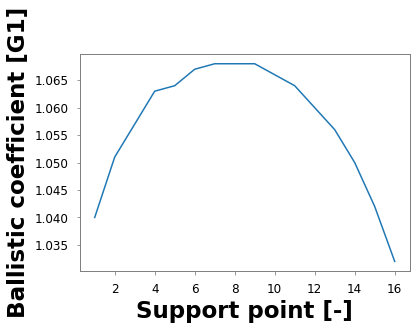

In [6]:
A.plot()

Not that fancy… you can set the `ggplot` style

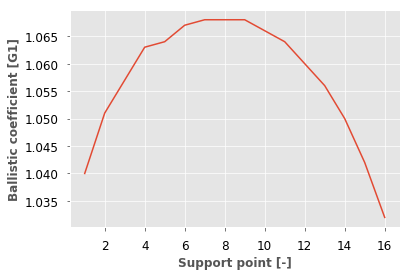

In [7]:
plt.style.use('ggplot')
A.plot()

If you don't like ggplot, choose one of the seaborn styles

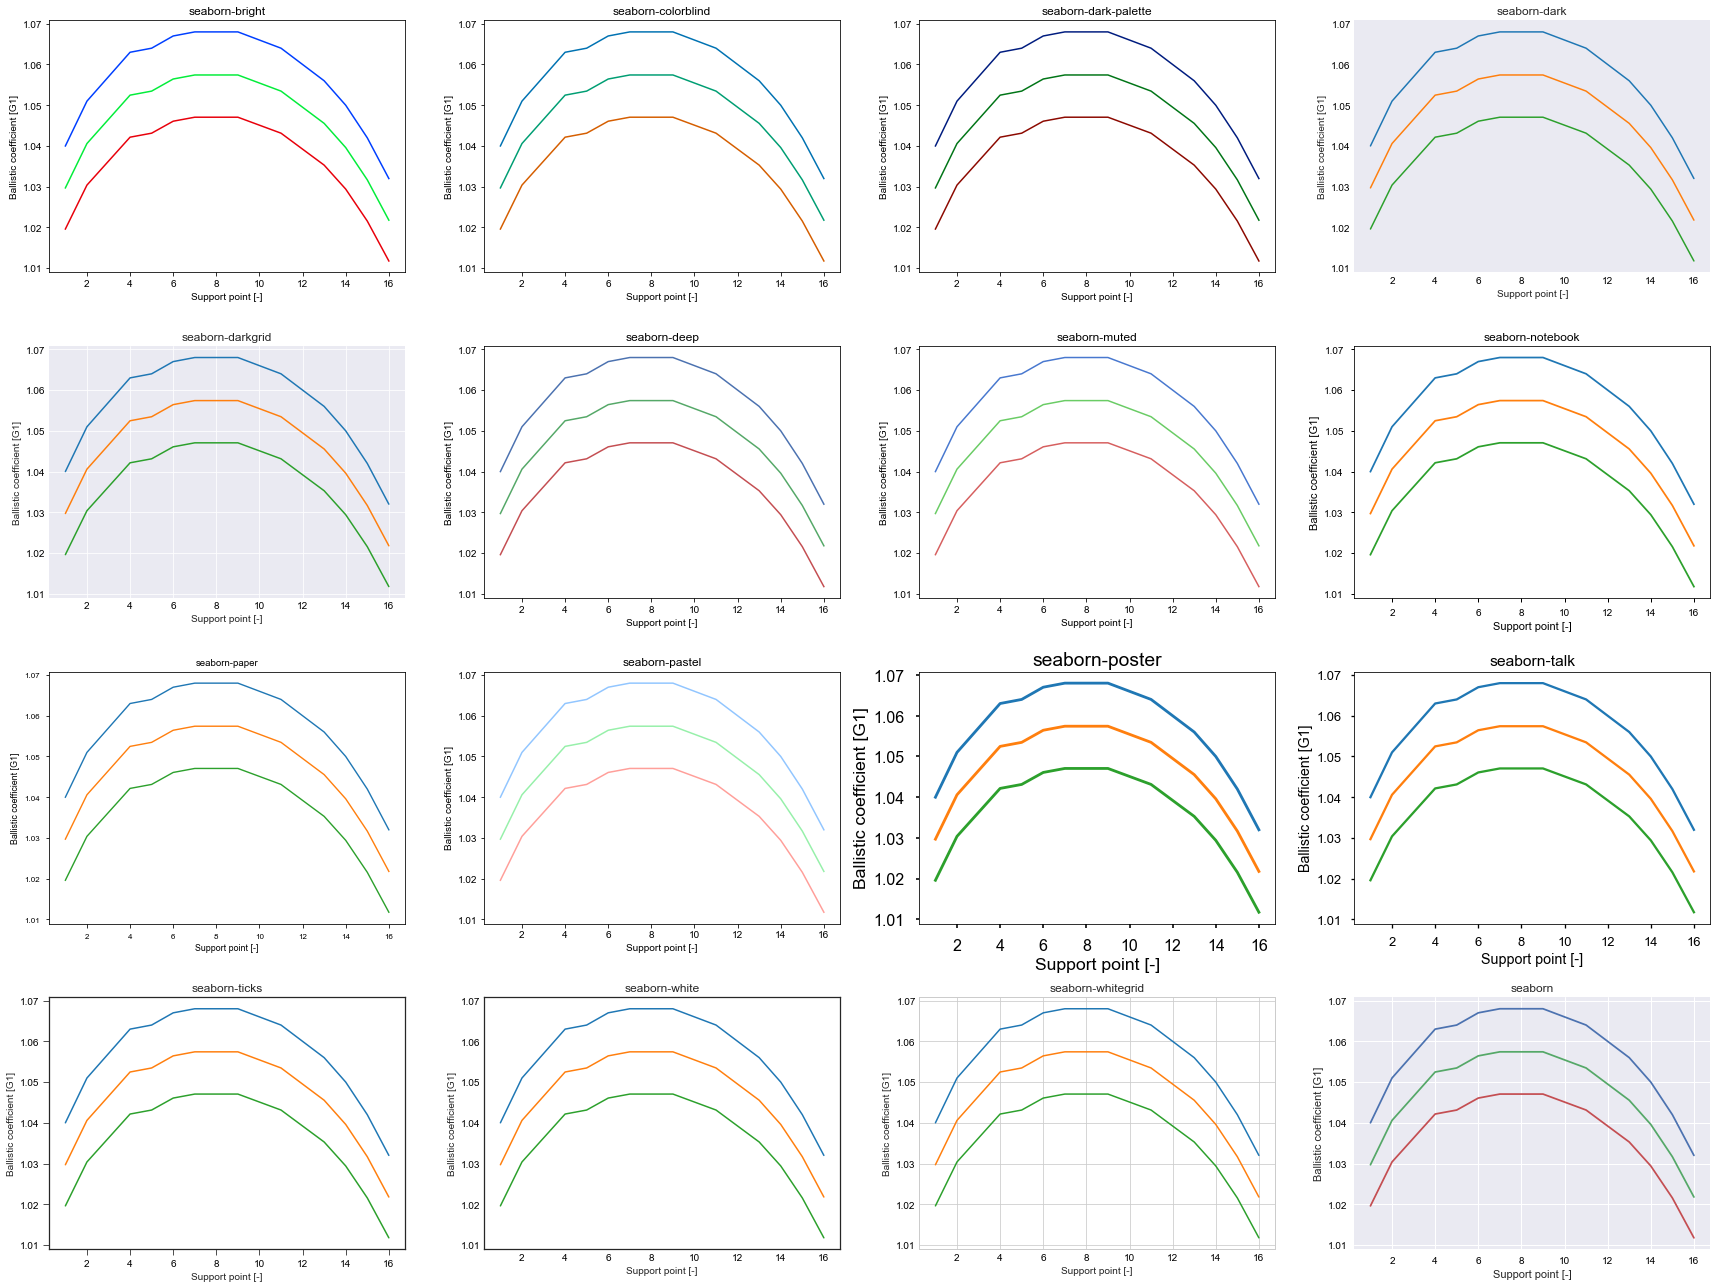

In [8]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
styles = [_s for _s in plt.style.available if 'seaborn' in _s]
n = np.ceil(np.sqrt(len(styles))).astype(np.int)

gs = gridspec.GridSpec(n, n)

plt.figure(figsize=(24,18))

for i, s in enumerate(styles):
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.style.use(s)
    plt.subplot(gs[i])
    A.plot()
    (A / 1.01).plot()
    (A / 1.02).plot()
    plt.title(s)

plt.tight_layout()

## mesh2d

From <a href="https://en.wikipedia.org/wiki/Ballistic_coefficient#The_transient_nature_of_bullet_ballistic_coefficients">Ballistic coefficient</a> article in Wikipedia.

Doppler radar measurement results for a lathe turned monolithic solid .50 BMG very-low-drag bullet (Lost River J40 13.0 millimetres (0.510 in), 50.1 grams (773 gr) monolithic solid bullet / twist rate 1:380 millimetres (15 in)) look like this:


In [9]:
BC = mesh2d(x=np.arange(500,2100,100), x_label="Range", x_unit="m",
            d=[1.040, 1.051, 1.057, 1.063, 1.064, 1.067, 1.068, 1.068, 1.068, 1.066, 1.064,
               1.060, 1.056, 1.050, 1.042, 1.032], label="Ballistic coefficient", unit="G1")

Display in the jupyter notebooks / ipython

In [10]:
BC

x = BreakPoints(d=[ 500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400,
             1500, 1600, 1700, 1800, 1900, 2000], label="Range", unit="m")
d = array([ 1.04 ,  1.051,  1.057,  1.063,  1.064,  1.067,  1.068,  1.068,
        1.068,  1.066,  1.064,  1.06 ,  1.056,  1.05 ,  1.042,  1.032])

Interpolation

In [11]:
BC(501)

1.04011

In [12]:
BC([501, 609, 2500])

array([ 1.04011,  1.05154,  0.982  ])

Default : values are extrapolated

In [13]:
BC.interpolate([501, 609, 2500])

array([ 1.04011,  1.05154,  1.032  ])

Interpolation is performed and boundaries values are kept

In [14]:
BC.options

{'extrapolate': True, 'step': False}

In [15]:
BC.options['extrapolate']= False

This can be controled though the dict key extrapolate in options or interpolate method.

In [16]:
BC([501, 609, 2500])

array([ 1.04011,  1.05154,  1.032  ])

In [17]:
BC.max()

1.0680000000000001

In [18]:
BC.max(argwhere=True)

(1100, 1.0680000000000001)

Plot as steps

I like the color from <a href="https://github.com/vega/vega/wiki/Scales">vega</a>

In [19]:
from cycler import cycler
category20 = cycler('color', ['#1f77b4', '#aec7e8', '#ff7f0e',
                              '#ffbb78', '#2ca02c', '#98df8a',
                              '#d62728', '#ff9896', '#9467bd',
                              '#c5b0d5', '#8c564b', '#c49c94',
                              '#e377c2', '#f7b6d2', '#7f7f7f',
                              '#c7c7c7', '#bcbd22', '#dbdb8d',
                              '#17becf', '#9edae5'])

plt.style.use('seaborn-darkgrid')
plt.rc('axes', prop_cycle=category20)

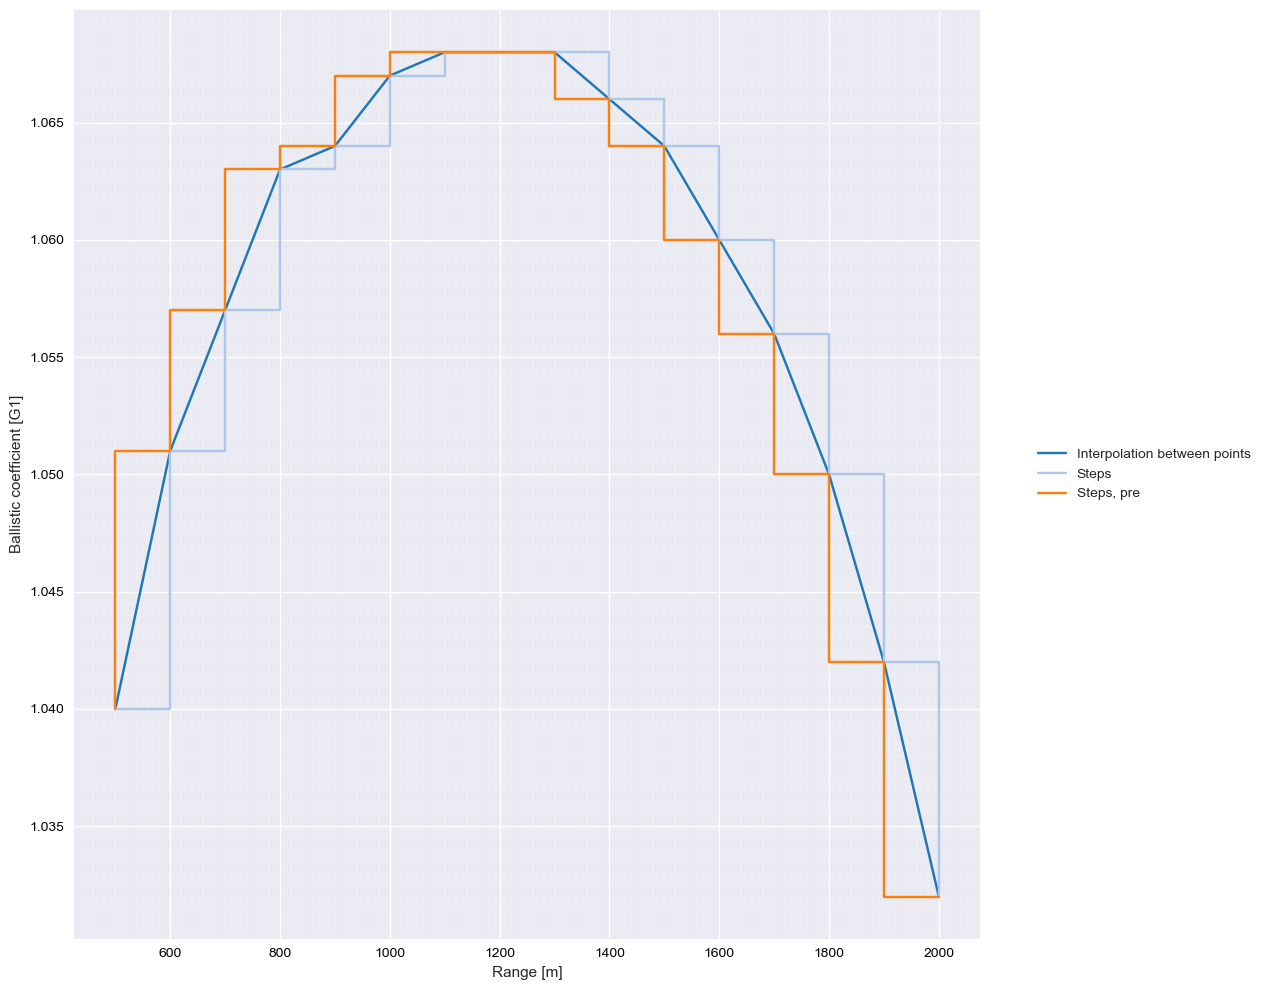

In [20]:
plt.figure(figsize=(10,10))

BC.plot(label="Interpolation between points")
BC.steps.plot(label="Steps")
BC.steps.plot(where="pre", label="Steps, pre")

plt.graphpaper(dx=200, dy=0.005)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', facecolor="white", frameon=False)
plt.tight_layout()

Slicing

In [21]:
BC[2:4]

x = BreakPoints(d=[700, 800], label="Range", unit="m")
d = array([ 1.057,  1.063])

Breakpoints strictly monotone, reverse order has no effect

In [22]:
BC[::-1]

x = BreakPoints(d=[ 500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400,
             1500, 1600, 1700, 1800, 1900, 2000], label="Range", unit="m")
d = array([ 1.04 ,  1.051,  1.057,  1.063,  1.064,  1.067,  1.068,  1.068,
        1.068,  1.066,  1.064,  1.06 ,  1.056,  1.05 ,  1.042,  1.032])

In [23]:
BC[6]

(1100, 1.0680000000000001)

In [24]:
BC.x

0,1,2,3,4,5,6,7,8,9,10,11,12,13,...,15
500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,...,2000


In [25]:
BC(np.arange(500, 550, 10))

array([ 1.04  ,  1.0411,  1.0422,  1.0433,  1.0444])

In [26]:
BC.resample(np.arange(500, 2000, 200))

x = BreakPoints(d=[ 500,  700,  900, 1100, 1300, 1500, 1700, 1900], label="Range", unit="m")
d = array([ 1.04 ,  1.057,  1.064,  1.068,  1.068,  1.064,  1.056,  1.042])

In [27]:
BC.steps(BC.x)

array([ 1.04 ,  1.051,  1.057,  1.063,  1.064,  1.067,  1.068,  1.068,
        1.068,  1.066,  1.064,  1.06 ,  1.056,  1.05 ,  1.042,  1.032])

In [28]:
BC.__dict__

{'_d': array([ 1.04 ,  1.051,  1.057,  1.063,  1.064,  1.067,  1.068,  1.068,
         1.068,  1.066,  1.064,  1.06 ,  1.056,  1.05 ,  1.042,  1.032]),
 '_options': {'extrapolate': False, 'step': False},
 '_steps': x = BreakPoints(d=[ 500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400,
              1500, 1600, 1700, 1800, 1900, 2000], label="Range", unit="m")
 d = array([ 1.04 ,  1.051,  1.057,  1.063,  1.064,  1.067,  1.068,  1.068,
         1.068,  1.066,  1.064,  1.06 ,  1.056,  1.05 ,  1.042,  1.032]),
 '_x': BreakPoints(d=[ 500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400,
              1500, 1600, 1700, 1800, 1900, 2000], label="Range", unit="m"),
 'label': 'Ballistic coefficient',
 'unit': 'G1'}

<h3><code>.polyfit()</code>: how to get a <code>polymesh</code> object from discrete values</h3>

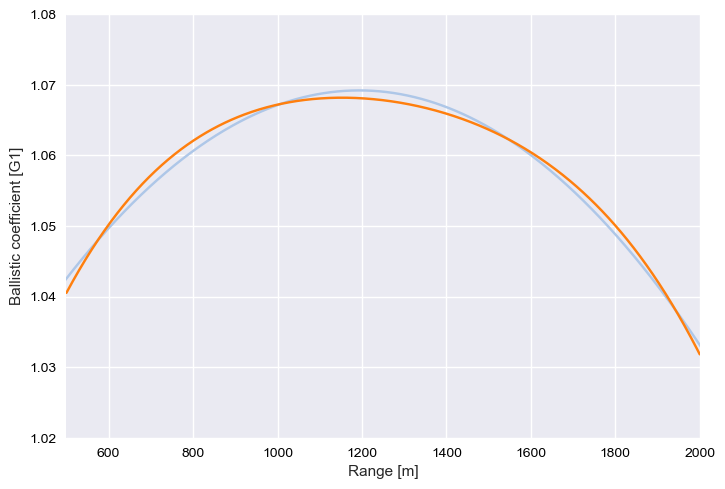

In [29]:
BC.plot("+")
BC.polyfit(degree=2).plot(xlim=[500,2000])
BC.polyfit(degree=4).plot(xlim=[500,2000], ylim=[1.02, 1.08])

In [30]:
BC.polyfit(degree=4)

-3.5896443597682554e-14·x^4 + 1.820225053584262e-10·x^3 - 3.821239680082758e-07·x^2 + 0.00037528910653332015·x + 0.9278994701119253

In [31]:
from sklearn.metrics import r2_score

for i in range(10):
    print(i, r2_score(BC.d, BC.polyfit(degree=i)(BC.x).d))

0 0.0
1 0.0698263920953
2 0.988101760851
3 0.988408030976
4 0.997727098729
5 0.998238919776
6 0.998565636158
7 0.998569159428
8 0.998610724807
9 0.998652377691


<h3><code>.__add__()</code></h3>

In [32]:
# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
test2 = mesh2d(x, y)
x2 = np.arange(0,60)
test = mesh2d(x2, np.sin(x2), x_label="Mon label", unit="%")

In [33]:
(test + test2)

x = BreakPoints(d=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
             15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
             30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
             45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], label="None", unit="None")
d = array([  5.        ,   6.84147098,   7.90929743,   2.14112001,
         3.2431975 ,   4.04107573,   5.7205845 ,   7.6569866 ,
         8.98935825,   9.41211849,   9.45597889,  10.00000979,
        11.46342708,  13.42016704,  14.99060736,  15.65028784,
        15.71209668,  16.03860251,  17.24901275,  19.14987721,
        20.91294525,  21.83665564,  21.99114869,  22.1537796 ,
        23.09442164,  24.86764825,  26.76255845,  27.95637593,
        28.27090579,  28.33636612,  29.01196838,  30.59596235,
        32.55142668,  33.99991186,  34.52908269,  34.57181733,
        35.00822115,  36.35646187,  38.29636858,  39.96379539,
        40.74511316,  40.84137733,  41.08347845,  42.16822526,
        44.01770193,  45.85090352,  46.90178835,  47.12357312,
        47.23174534,  48.04624735,  49.73762515,  51.67022918,
        52.98662759,  53.39592515,  53.44121095,  54.00024483,
        55.478449  ,  57.43616476,  58.99287265,  59.63673801])

In [34]:
test[:4]

x = BreakPoints(d=[0, 1, 2, 3], label="Mon label", unit="None")
d = array([ 0.        ,  0.84147098,  0.90929743,  0.14112001])

In [35]:
test[-3:] + test[:4]

x = BreakPoints(d=[ 0,  1,  2,  3, 57, 58, 59], label="None", unit="None")
d = array([-31.29618514, -29.89800626, -29.27347192, -29.48494145,
       -40.90429585, -41.11576538, -42.24007744])

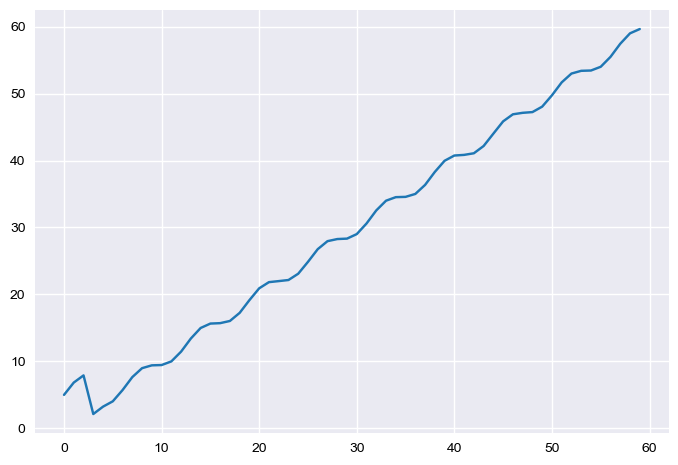

In [36]:
(test + test2).plot()

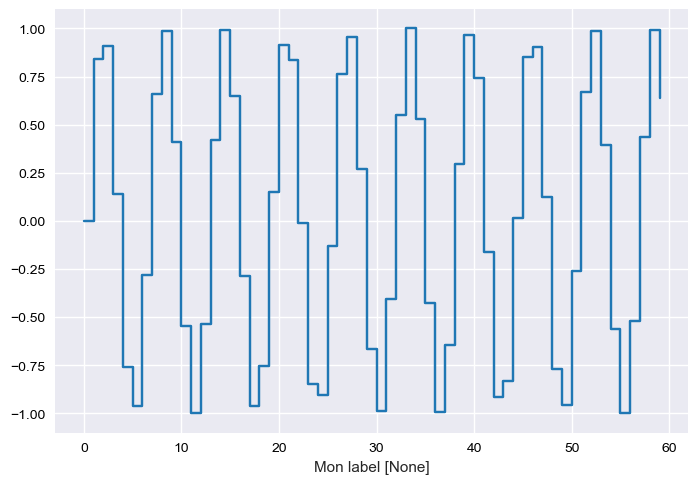

In [37]:
test.steps.plot()

In [38]:
test

x = BreakPoints(d=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
             15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
             30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
             45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], label="Mon label", unit="None")
d = array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736,
        0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721,
        0.91294525,  0.83665564, -0.00885131, -0.8462204 , -0.90557836,
       -0.13235175,  0.76255845,  0.95637593,  0.27090579, -0.66363388,
       -0.98803162, -0.40403765,  0.55142668,  0.99991186,  0.52908269,
       -0.42818267, -0.99177885, -0.64353813,  0.29636858,  0.96379539,
        0.74511316, -0.15862267, -0.91652155, -0.83177474,  0.01770193,
        0.85090352,  0.90178835,  0.12357312, -0.76825466, -0.95375265,
       -0.26237485,  0.67022918,  0.98662759,  0.39592515, -0.55878905,
       -0.99975517, -0.521551  ,  0.43616476,  0.99287265,  0.63673801])

In [39]:
test.resample(np.linspace(0,60,100))

x = BreakPoints(d=[  0.  ,   0.61,   1.21,   1.82,   2.42,   3.03,   3.64,
               4.24,   4.85,   5.45,   6.06,   6.67,   7.27,   7.88,
               8.48,   9.09,   9.7 ,  10.3 ,  10.91,  11.52,  12.12,
              12.73,  13.33,  13.94,  14.55,  15.15,  15.76,  16.36,
              16.97,  17.58,  18.18,  18.79,  19.39,  20.  ,  20.61,
              21.21,  21.82,  22.42,  23.03,  23.64,  24.24,  24.85,
              25.45,  26.06,  26.67,  27.27,  27.88,  28.48,  29.09,
              29.7 ,  30.3 ,  30.91,  31.52,  32.12,  32.73,  33.33,
              33.94,  34.55,  35.15,  35.76,  36.36,  36.97,  37.58,
              38.18,  38.79,  39.39,  40.  ,  40.61,  41.21,  41.82,
              42.42,  43.03,  43.64,  44.24,  44.85,  45.45,  46.06,
              46.67,  47.27,  47.88,  48.48,  49.09,  49.7 ,  50.3 ,
              50.91,  51.52,  52.12,  52.73,  53.33,  53.94,  54.55,
              55.15,  55.76,  56.36,  56.97,  57.58,  58.18,  58.79,
              59.39,  60.  ], label="Mon label", unit="None")
d = array([ 0.        ,  0.50998242,  0.85585841,  0.89696535,  0.58340398,
        0.11391024, -0.43028522, -0.80580171, -0.92829976, -0.65005665,
       -0.22266386,  0.34485257,  0.74763341,  0.94907077,  0.70948442,
        0.3251967 , -0.25428184, -0.68219356, -0.95853847, -0.76126009,
       -0.42060444,  0.15923796,  0.61031381,  0.95603522,  0.80497853,
        0.50813766, -0.06046304, -0.53281029, -0.94098858, -0.8402522 ,
       -0.58719371, -0.04121525,  0.45047977,  0.91294525,  0.86670912,
        0.65730568,  0.14487723, -0.3640988 , -0.84801913, -0.88399365,
       -0.71812949, -0.2495073 ,  0.27442561,  0.77430496,  0.8917701 ,
        0.76942953,  0.35399308, -0.18220436, -0.69312459, -0.88972928,
       -0.81106375, -0.45712801,  0.08817125,  0.60578852,  0.87759772,
        0.8429688 ,  0.55761779,  0.00693795, -0.51357603, -0.85514948,
       -0.86514586, -0.65409088, -0.10237972,  0.41771891,  0.82222   ,
        0.87764784,  0.74511316,  0.19739448, -0.3193891 , -0.77872175,
       -0.88056836, -0.80603303, -0.29119868,  0.21969019,  0.72466086,
        0.87403299,  0.85462379,  0.3829782 , -0.11965264, -0.66015432,
       -0.85819308, -0.89090013, -0.47188328,  0.02023243,  0.58544699,
        0.8332223 ,  0.9150273 ,  0.55702582,  0.07768708, -0.50092758,
       -0.79931603, -0.9273    , -0.63747929, -0.17329073,  0.40714307,
        0.75669354,  0.9281209 ,  0.71228172,  0.49644254,  0.28060337])

(-5, 2)

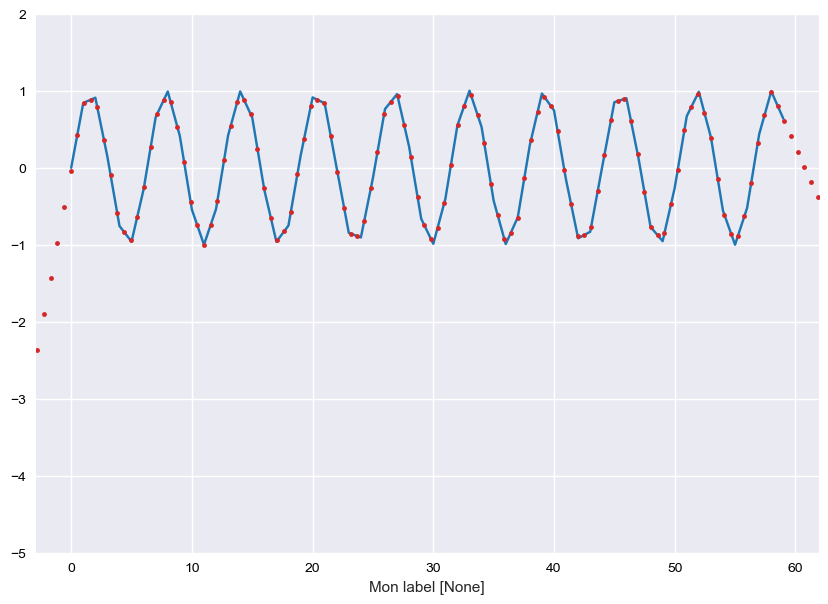

In [40]:
plt.figure(figsize=(12,7))
test.plot()
newX = np.linspace(-10,100,200)
test.resample(newX).plot('.', c=category20.by_key()['color'][6], lw=0.1)
plt.ylim(-5, 2)

Not implemented

In [41]:
test + test2.steps

x = BreakPoints(d=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
             15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
             30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
             45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], label="None", unit="None")
d = array([  5.        ,   6.84147098,   7.90929743,   2.14112001,
         3.2431975 ,   4.04107573,   5.7205845 ,   7.6569866 ,
         8.98935825,   9.41211849,   9.45597889,  10.00000979,
        11.46342708,  13.42016704,  14.99060736,  15.65028784,
        15.71209668,  16.03860251,  17.24901275,  19.14987721,
        20.91294525,  21.83665564,  21.99114869,  22.1537796 ,
        23.09442164,  24.86764825,  26.76255845,  27.95637593,
        28.27090579,  28.33636612,  29.01196838,  30.59596235,
        32.55142668,  33.99991186,  34.52908269,  34.57181733,
        35.00822115,  36.35646187,  38.29636858,  39.96379539,
        40.74511316,  40.84137733,  41.08347845,  42.16822526,
        44.01770193,  45.85090352,  46.90178835,  47.12357312,
        47.23174534,  48.04624735,  49.73762515,  51.67022918,
        52.98662759,  53.39592515,  53.44121095,  54.00024483,
        55.478449  ,  57.43616476,  58.99287265,  59.63673801])

In [42]:
test.steps([-10, 2.3, 3, 3.1, 59, 58.9, 90])

array([ -8.41470985,   0.6788442 ,   0.14112001,   0.05132776,
         0.63673801,   0.67235147, -10.40343586])

In [43]:
test.steps

x = BreakPoints(d=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
             15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
             30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
             45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], label="Mon label", unit="None")
d = array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736,
        0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721,
        0.91294525,  0.83665564, -0.00885131, -0.8462204 , -0.90557836,
       -0.13235175,  0.76255845,  0.95637593,  0.27090579, -0.66363388,
       -0.98803162, -0.40403765,  0.55142668,  0.99991186,  0.52908269,
       -0.42818267, -0.99177885, -0.64353813,  0.29636858,  0.96379539,
        0.74511316, -0.15862267, -0.91652155, -0.83177474,  0.01770193,
        0.85090352,  0.90178835,  0.12357312, -0.76825466, -0.95375265,
       -0.26237485,  0.67022918,  0.98662759,  0.39592515, -0.55878905,
       -0.99975517, -0.521551  ,  0.43616476,  0.99287265,  0.63673801])

In [44]:
test.diff(n=1)

x = BreakPoints(d=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
             15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
             30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
             45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], label="Mon label", unit="None")
d = array([ 0.84147098,  0.06782644, -0.76817742, -0.8979225 , -0.20212178,
        0.67950878,  0.9364021 ,  0.33237165, -0.57723976, -0.9561396 ,
       -0.4559691 ,  0.46341729,  0.95673995,  0.57044032, -0.34031952,
       -0.93819116, -0.67349418,  0.21041025,  0.90086446,  0.76306804,
       -0.07628961, -0.84550695, -0.83736909, -0.05935796,  0.77322661,
        0.8949102 ,  0.19381748, -0.68547014, -0.93453967, -0.32439774,
        0.58399398,  0.95546433,  0.44848518, -0.47082917, -0.95726536,
       -0.56359618,  0.34824072,  0.93990671,  0.66742681, -0.21868223,
       -0.90373583, -0.75789888,  0.08474681,  0.84947667,  0.8332016 ,
        0.05088482, -0.77821522, -0.89182778, -0.18549799,  0.6913778 ,
        0.93260403,  0.31639842, -0.59070244, -0.9547142 , -0.44096612,
        0.47820417,  0.95771576,  0.55670789, -0.35613464])

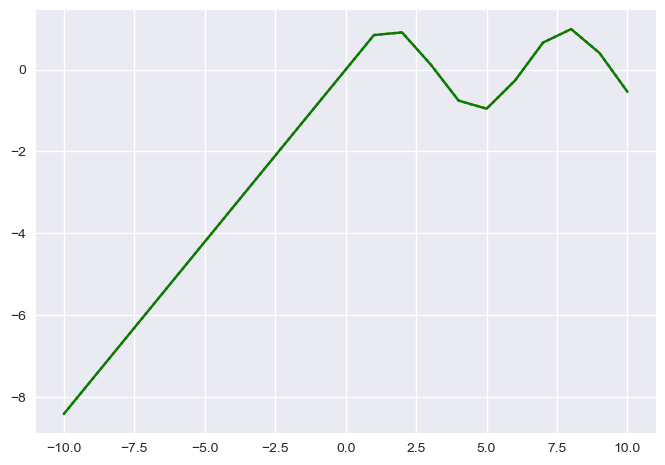

In [45]:
#plt.plot(test.X, test.Y, c="b")
newX = np.arange(-10, 10, 0.001)
plt.plot(newX, test(newX), ":r")
plt.plot(newX, test.steps(newX), "-g")

In [46]:
test.steps(newX)

array([-8.41470985, -8.41386838, -8.41302691, ..., -0.54115269,
       -0.54210883, -0.54306497])

In [47]:
import random
from numba import jit

N = 200
myMesh = mesh2d(np.arange(N)*5, [random.uniform(2.5, 10.0) for i in range(N)], x_label="MON Label")

In [48]:
@jit
def _extrapolate(self, X):
    """
    """
    if X <= self.x[0]:
        res = self.d[0] + (X - self.x[0]) *\
            (self.d[1] - self.d[0]) / (self.x[1] - self.x[0])
    elif X >= self.x[-1]:
        res = self.d[-1] + (x - self.x[-1]) *\
            (self.d[-1] - self.d[-2]) / (self.x[-1] - self.x[-2])
    else:
        res = np.interp(X, self.x, self.d)
    return res

In [49]:
%timeit myMesh.extrapolate(255)

21.7 µs ± 915 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [50]:
%timeit _extrapolate(myMesh, 255)

The slowest run took 5.50 times longer than the fastest. This could mean that an intermediate result is being cached.
94.3 µs ± 87.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
np.diff(test2.d) / np.diff(test2.x)

0,1,2,3
1.0,-5.0,2.0,1.0


## mesh3d

In [52]:
m3d = mesh3d(x=np.arange(10), x_label="X", x_unit="X unit",
             y=np.arange(10), y_label="Y", y_unit="Y unit",
             d=np.random.random((10,10)), label="data", unit="data unit")

In [53]:
lerp.options.display.max_rows = 15

In [54]:
m3d

In [55]:
m3d(4.5, 5.7)

0.22891672933562421

Interpolation

In [56]:
m3d(3.5, 5.6)

0.24804759269057369

Call method default : extrapolation above boundaries

In [57]:
m3d(9.1,9.4)

1.2617807437078306

As far mesh2d, can be set with options attributes or method call .interpolate

In [58]:
m3d.options

{'extrapolate': True}

In [59]:
m3d.interpolate(9.1,9.4)

0.9606969801252196

In [60]:
m3d(x=3.5)

x = BreakPoints(d=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], label="Y", unit="Y unit")
d = array([ 0.69944545,  0.45196195,  0.62338401,  0.22360536,  0.56315821,
        0.30124409,  0.21258326,  0.25238123,  0.70839876,  0.35742004])

Slicing

In [61]:
m3d[3:6]

<p><b>Garbage after that point</b></p>

In [62]:
from scipy import misc
from scipy import ndimage
# http://www.ndt.net/article/wcndt00/papers/idn360/idn360.htm

from PIL import Image
from urllib.request import urlopen
import io

URL = 'https://www.researchgate.net/profile/Robert_Dinnebier/publication/268693474/figure/fig5/AS:268859169046548@1441112429791/Log-log-plot-of-ionic-conductivity-times-temperature-versus-frequency-measured-at.png'

with urlopen(URL) as url:
    im = misc.imread(io.BytesIO(url.read()))

# face = misc.imread(f)

(-0.5, 388.5, 259.5, -0.5)

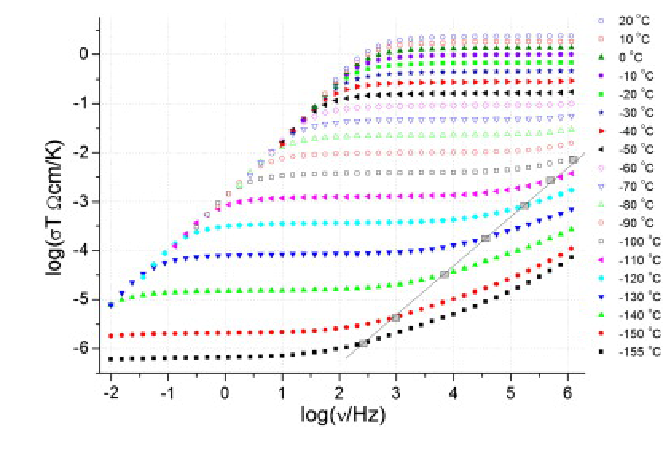

In [63]:
plt.imshow(im, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.axis('off')
# plt.contour(im, [50, 200])

In [64]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

In [65]:
sx = ndimage.sobel(im, axis=0, mode='constant')

<br/>
<paragraph>Source</paragraph>
<section>
 <p id="#fn1"><a href="r1">[1]</a> lerp article on <a href="https://en.wikipedia.org/wiki/Linear_interpolation">Wikipedia</a></p>
</section>